In [656]:
# %run code/add_data.py
import numpy as np
import pandas as pd
import json
import requests
import os

os.system("ls data/zippedData | grep sv > file_list.txt")

import matplotlib.pyplot as plt
%matplotlib inline


In [657]:
with open ('file_list.txt', 'r') as f:
    file_list= f.readlines()
    
csv_dict = {}

for csv in file_list:
    file='data/ZippedData/'+csv.strip()
    df_name=csv.strip()
    df_name=df_name.split('.csv.gz')[0]
    if 'csv' in file:
        df=pd.read_csv(file, compression='gzip')
    elif 'tsv' in file:
        df=pd.read_csv(file, compression='gzip', delimiter='\t', encoding='latin-1')
    else: print(file, ": unkown file!")
    csv_dict[df_name] = df


    



In [658]:
print(csv_dict.keys())
#print(tsv_dict.keys())

#csv_dict.get("tmdb_movie_ids") # has list of 330000 tmdb ids, titles, popularity
#csv_dict.get("bom.movie_gross") # has key title: values <studio>, gross, year

#csv_dict.get("imdb.name.basics").head() # name of a person and lists of production, profession and title 
#csv_dict.get("imdb.title.principals").head() # similar name.basics, but has explicit category, as well as details for actors

#csv_dict.get("imdb.title.akas").head() # title id and <title for different regions if needed> 
csv_dict.get("imdb.title.basics")# has key title, values: genres, length, future year
#csv_dict.get("imdb.title.ratings").head() # # tittle_id, averagerating, numvotes

#csv_dict.get("imdb.title.crew").head() # # LOOKUP TABLE can be joined with name_basics and movie basics 


#csv_dict.get("tmdb.movies") # TMDB tittle_id, averagerating, numvotes, list of genres, original lang, populatrity
#csv_dict.get("imdb.title.ratings").head() # #IMDB tittle_id, averagerating, numvotes

#csv_dict.get("tn.movie_budgets") # #tn title, date, budget and gross

#tsv_dict.get("rt.reviews")# #reviews probably can joined with rt.movie_info on id

#tsv_dict.get("rt.movie_info").info()# #reviews probably can joined with rt.movie_info on id
#len(csv_dict["tmdb_imdb_gross"][csv_dict["tmdb_imdb_gross"]["budget"]==0])

dict_keys(['bom.movie_gross', 'imdb.name.basics', 'imdb.title.akas', 'imdb.title.basics', 'imdb.title.crew', 'imdb.title.principals', 'imdb.title.ratings', 'rt.movie_info.tsv.gz', 'rt.reviews.tsv.gz', 'tmdb.movies', 'tmdb_genres', 'tmdb_imdb_gross', 'tmdb_imdb_gross_test', 'tmdb_movie_ids', 'tn.movie_budgets'])


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [659]:
def gross_to_num(gross_str):
    try:
        gross_num=float(gross_str.replace('$','').replace(',',''))
        
    except:
        return np.NaN
    else:
        return gross_num

In [660]:
#csv_dict["bom.movie_gross"]["domestic_gross"].notna().sum()

In [661]:
# prepairing gross columns in tn.movie_budgets, tmbdb_imdb_gross, and bom.movie_gross
csv_dict["tn.movie_budgets"]["worldwide_gross_num"]=csv_dict["tn.movie_budgets"]["worldwide_gross"].apply(gross_to_num)
csv_dict["tn.movie_budgets"]["domestic_gross_num"]=csv_dict["tn.movie_budgets"]["domestic_gross"].apply(gross_to_num)

csv_dict["tmdb_imdb_gross"]["gross"]=csv_dict["tmdb_imdb_gross"]["revenue"]-csv_dict["tmdb_imdb_gross"]["budget"]

csv_dict["bom.movie_gross"]["foreign_gross_fixed"]=csv_dict["bom.movie_gross"].loc[:,"foreign_gross"].apply(gross_to_num)
csv_dict["bom.movie_gross"]["foreign_gross_fixed"].replace(np.NaN,0, inplace=True)
csv_dict["bom.movie_gross"]["domestic_gross"].replace(np.NaN,0, inplace=True)


csv_dict["bom.movie_gross"]["total_gross"]=csv_dict["bom.movie_gross"]["domestic_gross"]+csv_dict["bom.movie_gross"]["foreign_gross_fixed"]
#csv_dict["bom.movie_gross"].info()

In [662]:

def extract_year(year_string):
    return year_string.split(',')[1].strip()

csv_dict.get("tn.movie_budgets")["release_date"]=csv_dict.get("tn.movie_budgets")["release_date"].apply(extract_year)
csv_dict["tmdb_imdb_gross"]["release_date"]=csv_dict["tmdb_imdb_gross"]["release_date"].map(lambda x: str(x)[0:4])
csv_dict["bom.movie_gross"]["year"]=csv_dict["bom.movie_gross"]["year"].map(lambda x: str(x))  


In [668]:

# merging 3 tables: tmdb_imdb_gross, imdb.title.basics, tn.movie_budgets



merged_df=csv_dict["tmdb_imdb_gross"].merge(csv_dict["imdb.title.basics"], on='tconst', how='left')
merged1_df=merged_df.merge(csv_dict.get("tn.movie_budgets"), left_on=['primary_title','release_date'], right_on=["movie","release_date"], how="left")
merged2_df=merged1_df.merge(csv_dict.get("bom.movie_gross"), left_on=['primary_title','release_date'], right_on=["title","year"], how="left")


    


In [669]:
merged2_df["gross"].replace(0,np.NaN, inplace=True)
merged2_df["worldwide_gross_num"].replace(0,np.NaN, inplace=True)
merged2_df["total_gross"].replace(0,np.NaN, inplace=True)
#merged2_df["worldwide_gross_num"].notna().sum()


In [670]:

merged2_df["gross"].notna().sum()

5673

In [671]:

merged2_df["worldwide_gross_num"].fillna(merged2_df["gross"], inplace=True)
merged2_df["worldwide_gross_num"].fillna(merged2_df["total_gross"], inplace=True)
merged2_df["worldwide_gross_num"].notna().sum()
merged2_df.dropna(subset=["worldwide_gross_num"], inplace=True)
#len(merged2_df.loc[merged2_df["worldwide_gross_num"].notna(),:]["tconst"].unique())

columns=["gross","total_gross","worldwide_gross", "domestic_gross_x","domestic_gross_y", "foreign_gross", "Unnamed: 0", "Unnamed: 0.1", "movie"]
merged2_df.drop(columns=columns, inplace=True)

merged2_df["worldwide_gross_num"].notna().sum()


5953

In [672]:
merged2_df

,id_x,tconst,release_date,revenue,budget,primary_title,original_title,start_year,runtime_minutes,genres,id_y,production_budget,worldwide_gross_num,domestic_gross_num,title,studio,year,foreign_gross_fixed
4,262165,tt2488366,2014,0,100000,The Unwanted,The Unwanted,2014.0,95.0,"Drama,Horror,Mystery",NaN,NaN,-100000.0,NaN,NaN,NaN,NaN,NaN
6,27,tt0411705,2004,1574623,1000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574623.0,NaN,NaN,NaN,NaN,NaN
7,262175,tt3397838,2014,0,50000,Manos: The Hands of Felt,Manos: The Hands of Felt,2014.0,72.0,Comedy,NaN,NaN,-50000.0,NaN,NaN,NaN,NaN,NaN
9,262199,tt3596842,2014,0,300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-300000.0,NaN,NaN,NaN,NaN,NaN
10,62,tt0062622,1968,71923560,12000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59923560.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24973,392892,tt4642638,2015,0,30,Cedonia Avenue,Cedonia Avenue,2015.0,62.0,Drama,NaN,NaN,-30.0,NaN,NaN,NaN,NaN,NaN
24980,261825,tt3576084,2014,0,0,Zero Motivation,Efes beyahasei enosh,2014.0,97.0,"Comedy,Drama",NaN,NaN,116000.0,NaN,Zero Motivation,Zeit.,2014,0.0
24988,261860,tt3539664,2015,0,0,Dior and I,Dior et moi,2014.0,90.0,Documentary,NaN,NaN,1000000.0,NaN,Dior and I,Orch.,2015,0.0
24998,392982,tt5301662,2017,10051659,12000000,Marshall,Marshall,2017.0,118.0,"Biography,Crime,Drama",7.0,"$12,000,000",10116816.0,10051659.0,NaN,NaN,NaN,NaN


In [673]:

merged2_df["genre"]=merged2_df['genres'].str.split(',')
merged2_df.drop(columns='genres', inplace=True)




In [674]:
sep_genre_df=merged2_df.explode('genre')




#len(merged2_df)

In [675]:
sep_genre_df

,id_x,tconst,release_date,revenue,budget,primary_title,original_title,start_year,runtime_minutes,id_y,production_budget,worldwide_gross_num,domestic_gross_num,title,studio,year,foreign_gross_fixed,genre
4,262165,tt2488366,2014,0,100000,The Unwanted,The Unwanted,2014.0,95.0,NaN,NaN,-100000.0,NaN,NaN,NaN,NaN,NaN,Drama
4,262165,tt2488366,2014,0,100000,The Unwanted,The Unwanted,2014.0,95.0,NaN,NaN,-100000.0,NaN,NaN,NaN,NaN,NaN,Horror
4,262165,tt2488366,2014,0,100000,The Unwanted,The Unwanted,2014.0,95.0,NaN,NaN,-100000.0,NaN,NaN,NaN,NaN,NaN,Mystery
6,27,tt0411705,2004,1574623,1000000,NaN,NaN,NaN,NaN,NaN,NaN,574623.0,NaN,NaN,NaN,NaN,NaN,NaN
7,262175,tt3397838,2014,0,50000,Manos: The Hands of Felt,Manos: The Hands of Felt,2014.0,72.0,NaN,NaN,-50000.0,NaN,NaN,NaN,NaN,NaN,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24998,392982,tt5301662,2017,10051659,12000000,Marshall,Marshall,2017.0,118.0,7.0,"$12,000,000",10116816.0,10051659.0,NaN,NaN,NaN,NaN,Crime
24998,392982,tt5301662,2017,10051659,12000000,Marshall,Marshall,2017.0,118.0,7.0,"$12,000,000",10116816.0,10051659.0,NaN,NaN,NaN,NaN,Drama
25023,393184,tt5599692,2016,18215,0,Clash,Eshtebak,2016.0,97.0,NaN,NaN,18215.0,NaN,NaN,NaN,NaN,NaN,Drama
25023,393184,tt5599692,2016,18215,0,Clash,Eshtebak,2016.0,97.0,NaN,NaN,18215.0,NaN,NaN,NaN,NaN,NaN,Thriller


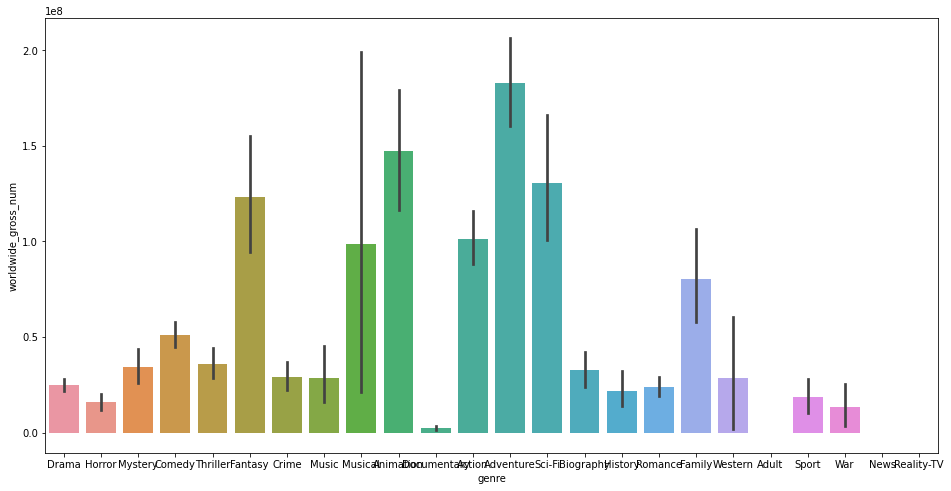

In [676]:
fig,ax=plt.subplots(  figsize=(16,8))
import seaborn as sns
sns.barplot(x='genre', y='worldwide_gross_num', data=sep_genre_df, ax=ax);
#sns.barplot(x='genre', y='gross', data=sep_genre_df, ax=ax[1]);